## Customer Segmentation
In this small project, we will analyze and study a dataset from [kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/) of a supermarket mall which collects data from membership cards. From this cards, we are able to obtain the following information:
- `CustomerID` : Unique ID assigned to the customer
- `Gender` : Gender of the customer
- `Age` : Age of the customer
- `Annual Income (Dollar)` : Annual Income of the customee
- `Spending Score` : Score assigned by the mall based on customer behavior and spending nature

Our goal is to answer to the following question: 
- Customer segmentation using Means Clustering
- Who are your target customers with whom you can start marketing strategy
- How the marketing strategy works in real world

### Import Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 

In [127]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

In [128]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 200 rows and 5 columns


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Note that in this small dataset, we don't have any missing values. Also, we have only one `objet` data type: the `gender` feature

In [130]:
# duplicate value
df.duplicated().sum()

0

In [131]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From a first sight, we note that it seem there are no outlier values

We could do a briefly overview of this mall's clients. 

We note that the **average age** of customers is **39**. As we can see, this card is given only to people with age greater then 18.

We note that the `Annual Income` has a significant range, with an average of 60.5K

We want also to investigate which information the gender gives us

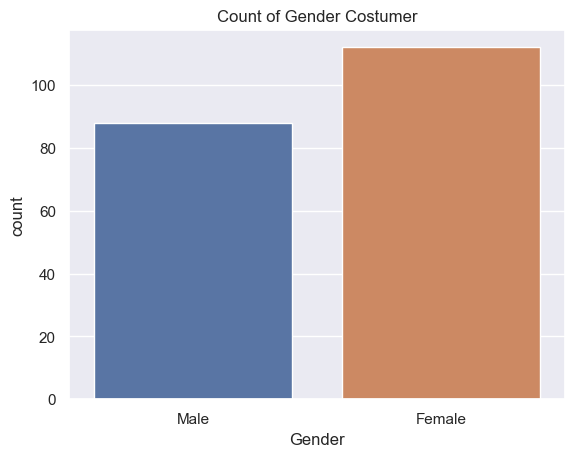

In [132]:
sns.countplot(data = df, x = 'Gender')
plt.title('Count of Gender Costumer')
plt.show()

In [133]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [134]:
gender_perc = (df['Gender'].value_counts() / df.shape[0]) * 100

In [135]:
gender_perc

Female    56.0
Male      44.0
Name: Gender, dtype: float64

In [136]:
print(f'Percentage of Female Customers: {gender_perc[0]} %')
print(f'Percentage of Male Customers: {gender_perc[1]} %')

Percentage of Female Customers: 56.00000000000001 %
Percentage of Male Customers: 44.0 %


Note that the female customers have an higer percentage, but it is not significantly higher

We want to analyze the distribution of the featires

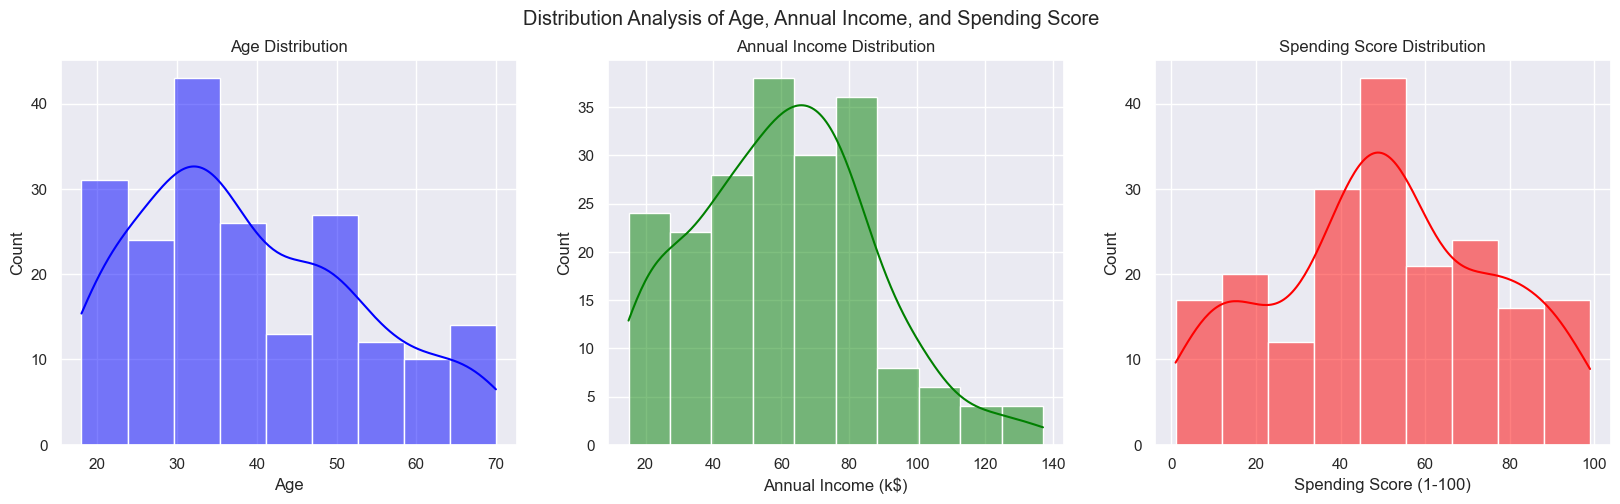

In [137]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the distribution of age, annual income, and spending score
sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

# Set the titles of the plots
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

# Set the title for the entire plot
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

# Display the plots
plt.show()

We note that `Age` and `Annual Income` have a skew distribution. This suggest that most of the mall's customer are younger individuals and the mall does not appeal to people with high income.

We do a bivariate analysis between `Spending Score` and `Age` features and between `Spending Score` and `Annual Income`

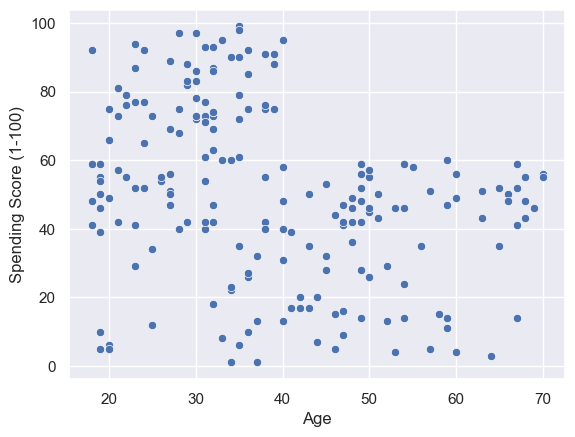

In [138]:
sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)')
plt.show()

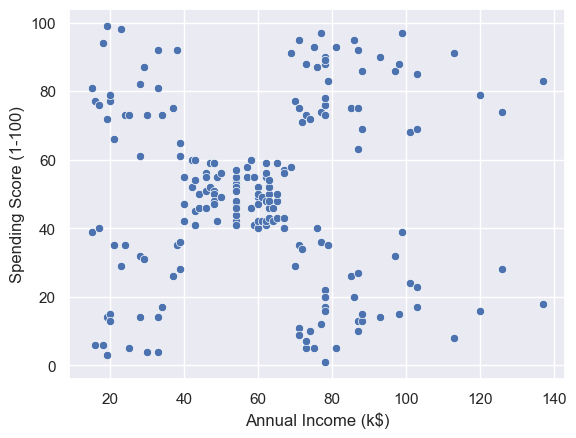

In [139]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')
plt.show()

From this scatter plot. it seems to have five groups of customers. We can confirm it using the **Elbow Method** to determine the bettern number of clusters K

### KMeans Model

#### Elbow Method
It is a technique used to determine the optimal number of cluster for the KMeans algorithm

Recall that elbow method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the “elbow” point in the curve, which represents the point of diminishing returns

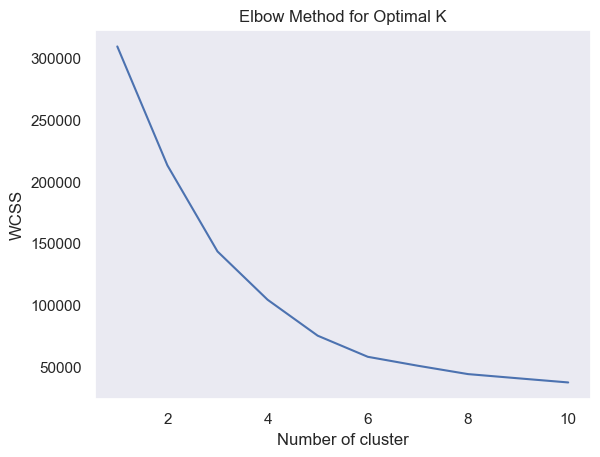

In [140]:
# features used for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method
wcss = []
for i in range(1 , 11):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(features)
    wcss.append(model.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

By the Elbow Method, we decide to take K = 5.

We are now ready to implement the Kmeans algorithm and fit it using the numeric feature that we had extract before from the dataset.

In this way we are able to group data into 5 clusters

In [141]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(features)

KMeans(n_clusters=5, random_state=0)

In [142]:
labels = kmeans.predict(features)
df['Class'] = labels

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


#### Statistical Description of clusters
We have now 5 cluster (enumerate from 0 to 4). We want to see which statistic characteristics of each features correspond to these clusters

In [143]:
cluster_grouping = df.groupby('Class')[features.columns].mean()

In [144]:
cluster_grouping[['Age', 'Spending Score (1-100)']] = cluster_grouping[['Age', 'Spending Score (1-100)']].astype(int)

In [145]:
cluster_grouping['Annual Income (k$)'] = cluster_grouping['Annual Income (k$)'].apply(lambda x: round(x, 2))

In [146]:
cluster_grouping.head()

,Age,Annual Income (k$),Spending Score (1-100)
Class,,,
0,45,26.30,20
1,32,86.54,82
2,43,55.29,49
3,40,87.75,17
4,25,26.30,78


We are able to idenitfy 5 types of customers of this mall. From the above table, we can see some statistical description of these 5 clusters. We represent this features per clusters in the following boxplots

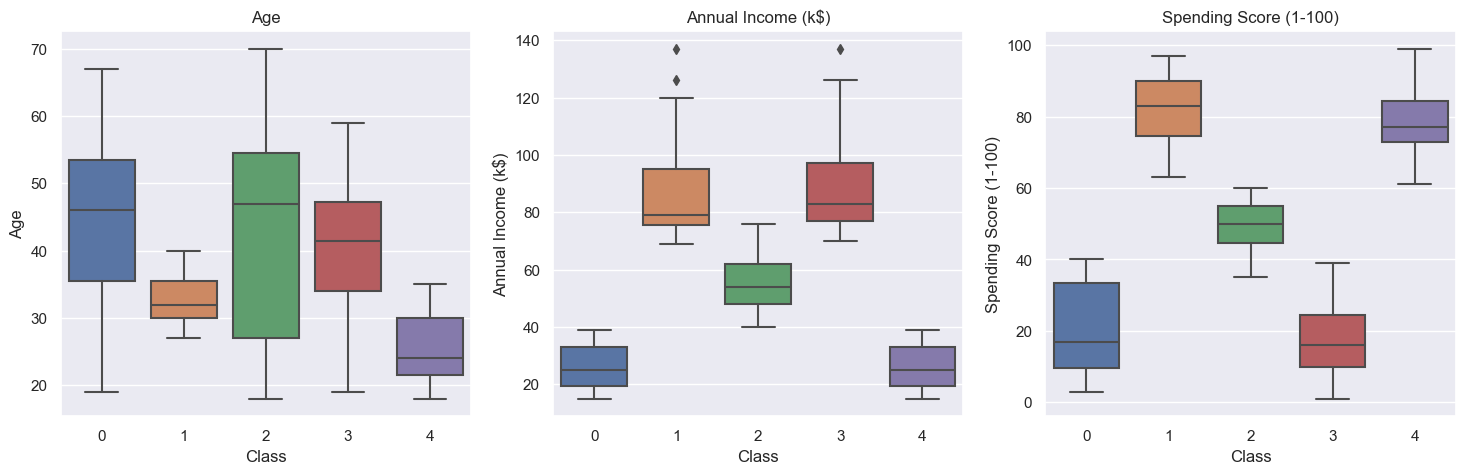

In [147]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i in range(0,3):
    sns.boxplot(data = df, x = 'Class', y = features.columns[i], ax = axes[i])
    axes[i].set_title(features.columns[i])
plt.show()

#### Scatterplot and bivariate analysis per Clusters

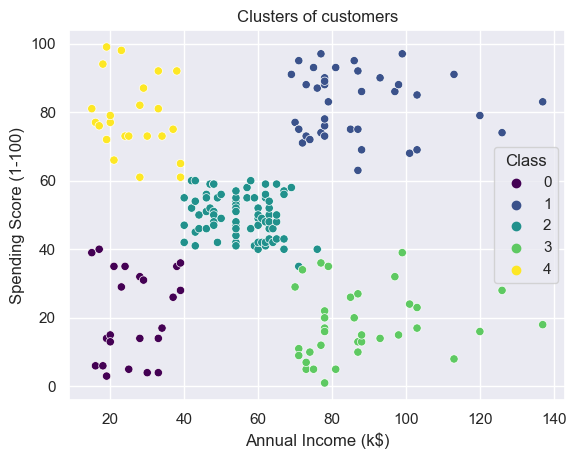

In [148]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', palette='viridis', hue = 'Class')
plt.title('Clusters of customers')
plt.show()

The above scatterplot gives us a visualization of the groups of customers in a bivariate analysis. We could do the following consideration:
- Class 0: low income and low spending. Customers with a lower incomes tend to spend less
- Class 1: high income and high spending. Customers with a higer incomes tend to spend more
- Class 2: medium income and medium spending. These customers have moderate incomes and spending habits
- Class 3: high income and low spending. Despite of the high income, these customers tend to spend less
- Class 4: low income anf high spending. Despite of the low income, these customers tend to spend more

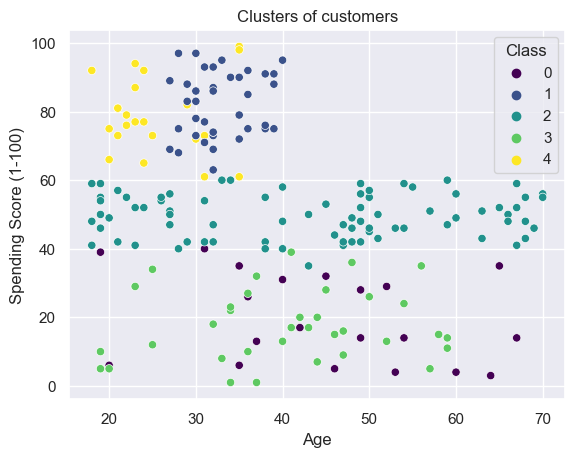

In [149]:
sns.scatterplot(data = df, x = 'Age',palette='viridis', hue = 'Class', y = 'Spending Score (1-100)')
plt.title('Clusters of customers')
plt.show()

From the above scatterplot we could note that younger customers tend to have higher spending score. By the fact that some age's ranges are overlapped, we could conclude that age is not so relevent in certain case.

#### Gender across clusters

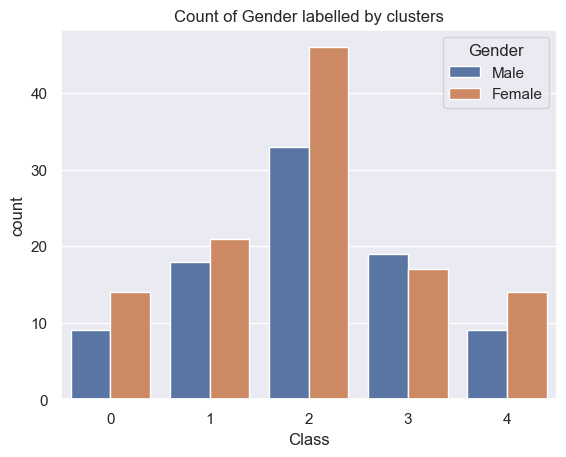

In [150]:
sns.set_style("darkgrid")
sns.countplot(data = df, x = 'Class', hue='Gender')

plt.title('Count of Gender labelled by clusters')
plt.show()

We note that in general the gender distribution across the clusters is balanced. Except from the cluster 3, the female gender is higher

#### Silhouette Score
We finally calculate the silhouette score, which is a measure that tells us how well each datapoint lies within its cluster. The score ranges from -1 to 1. 

- Slihouette score close to 1 indicates an high quality of the clustering
- Slihouette score close to 0 indicates overlapping clusters
- Slihouette score close to -1 indicates that data are incorrectly clustered

In [151]:
# Compute the silhouette score for the clustering
silhouette_score = metrics.silhouette_score(features, df['Class'])

# Print the silhouette score
print('Silhouette Score: ', silhouette_score)

Silhouette Score:  0.44428597560893024


In our case, the Slihouette score is 0.44. It is a reasonable clustering, but it could be improve usinG feature Engineering, different clustering algorithm, ...

#### Prediction Function

In [178]:
def prediction():
    y_test = []
    age = int(input('Insert age: '))
    income = int(input('Insert income: '))
    spending_score = int(input('Insert spending score: '))
    y_test.extend([age, income, spending_score])
    y_test = np.asarray(y_test)
    y_test = y_test.reshape(1, -1)
    y_pred = kmeans.predict(y_test)
    print(f'The corresponding cluster is : {y_pred}')

In [180]:
# run and insert
prediction()

Insert age: 18
Insert income: 16
Insert spending score: 40
The corresponding cluster is : [0]
